In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Train = pd.read_csv('Train.csv')
Test_data = pd.read_csv('Test.csv')
Test = Test_data.copy()

In [3]:
Train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
Test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [6]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [7]:
Train.drop(columns = ['id'],inplace =True)
Test.drop(columns = ['id'],inplace =True)

In [287]:
Train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [288]:
Train['gender'] = np.where(Train['gender'] == 'Male',1,0)
Test['gender'] = np.where(Test['gender'] == 'Male',1,0)

In [289]:
Train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,1,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,1,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,0,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,1,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [290]:
Train.area.value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [291]:
Train.policy.value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

In [292]:
Train = pd.get_dummies(Train,columns=['policy'],drop_first=True)

In [293]:
Train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,policy_B,policy_C
0,1,Urban,Bachelor,5L-10L,1,5,5790,More than 1,Platinum,64308,0,0
1,1,Rural,High School,5L-10L,0,8,5080,More than 1,Platinum,515400,0,0
2,1,Urban,Bachelor,5L-10L,1,8,2599,More than 1,Platinum,64212,0,0
3,0,Rural,High School,5L-10L,0,7,0,More than 1,Platinum,97920,0,0
4,1,Urban,High School,More than 10L,1,6,3508,More than 1,Gold,59736,0,0


In [294]:
Test = pd.get_dummies(Test,columns=['policy'],drop_first=True)

In [295]:
# Categorical Features present in the dataset
Categorical_Features = Train.select_dtypes(['object'])
Categorical_Features.columns

Index(['area', 'qualification', 'income', 'num_policies', 'type_of_policy'], dtype='object')

In [296]:
# Numerical Features present in the dataset
Numerical_Features = Train.select_dtypes(['float64','int64'])
Numerical_Features.columns

Index(['marital_status', 'vintage', 'claim_amount', 'cltv'], dtype='object')

In [297]:
# Categorical Features present in the Test dataset
Categorical_Features_test = Test.select_dtypes(['object'])
Categorical_Features_test.columns

Index(['area', 'qualification', 'income', 'num_policies', 'type_of_policy'], dtype='object')

In [298]:
# Numerical Features present in the dataset
Numerical_Features_test = Test.select_dtypes(['float64','int64'])
Numerical_Features_test.columns

Index(['marital_status', 'vintage', 'claim_amount'], dtype='object')

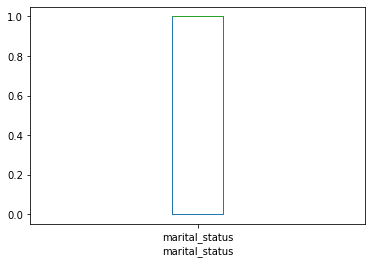

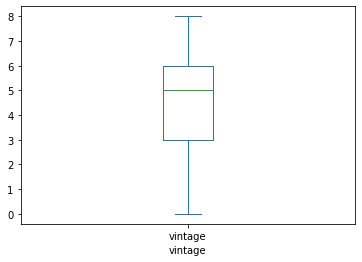

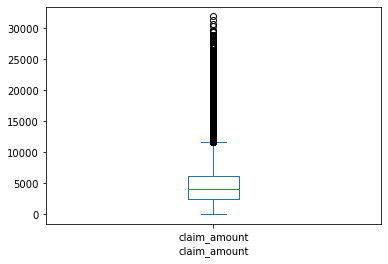

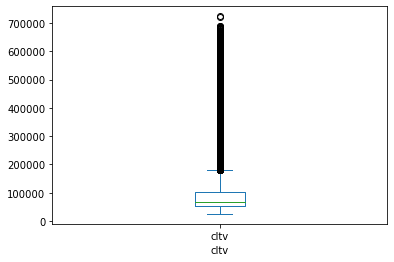

In [299]:
# box plot to detect outlier in dataset
for i in Numerical_Features.columns:
    Train[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

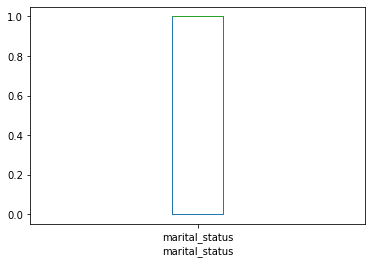

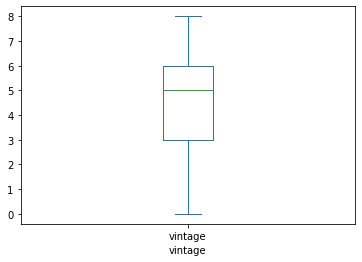

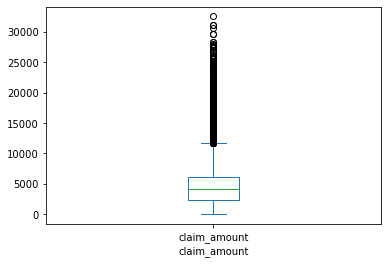

In [300]:
# box plot to detect outlier in dataset
for i in Numerical_Features_test.columns:
    Test[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [301]:
#outlier treatment
def outlier_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lc = q1 - 1.5 * iqr
        uc = q3 + 1.5 * iqr
        x = x.clip(lower = lc, upper = uc)
    else:
        x
    return x 

In [302]:
Train = Train.apply(outlier_var)

In [303]:
Test = Test.apply(outlier_var)

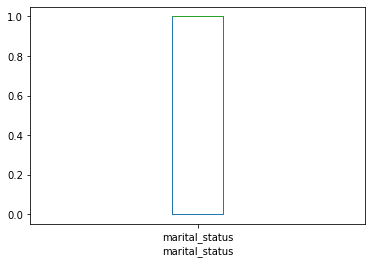

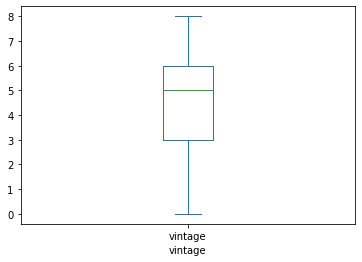

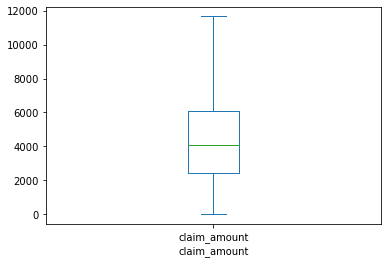

In [304]:
# box plot to detect outlier in dataset
for i in Numerical_Features_test.columns:
    Test[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

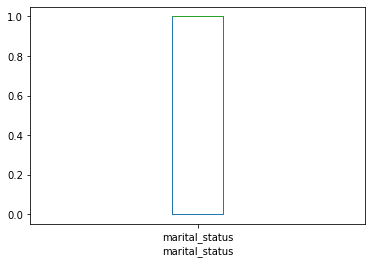

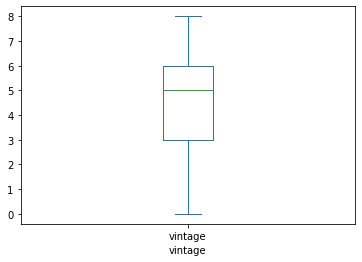

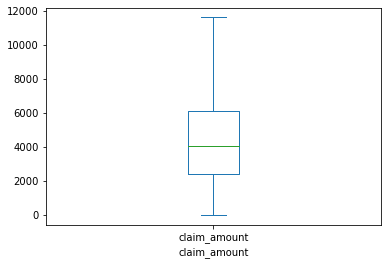

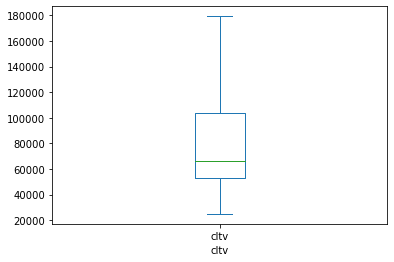

In [305]:
# box plot to detect outlier in dataset
for i in Numerical_Features.columns:
    Train[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

marital_status
-0.30545220097763


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


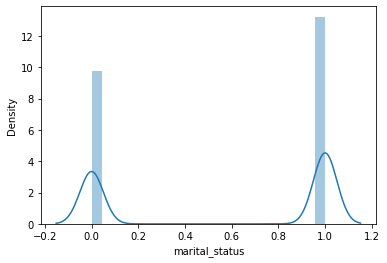

vintage
-0.3782604439479272


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


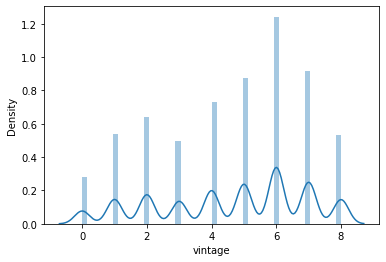

claim_amount
0.3535198165579579


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


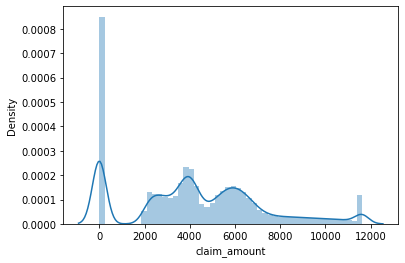

cltv
1.0309065360207346


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


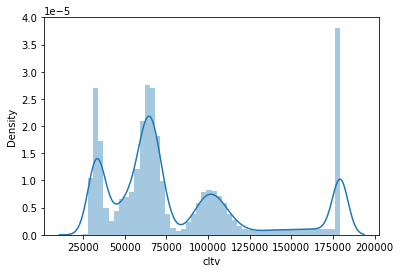

In [306]:
from scipy.stats import skew
for col in Numerical_Features.columns:
    print(col)
    print(skew(Train[col]))
    
    plt.figure()
    sns.distplot(Train[col])
    plt.show()

marital_status
-0.3114183094825178


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


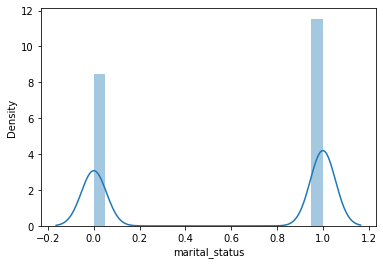

vintage
-0.38428005888818756


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


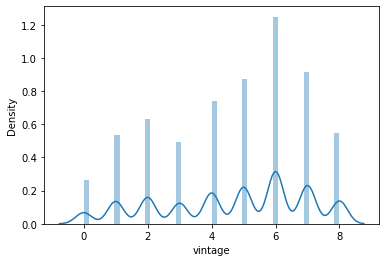

claim_amount
0.3528114727857348


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


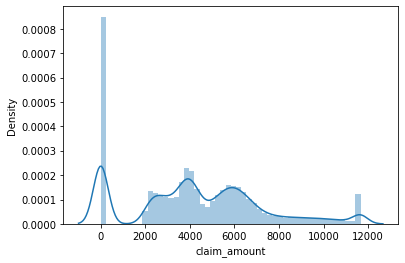

In [307]:
from scipy.stats import skew
for col in Numerical_Features_test.columns:
    print(col)
    print(skew(Test[col]))
    
    plt.figure()
    sns.distplot(Test[col])
    plt.show()

In [308]:
Train['area'] = np.where(Train['area'] == 'Urban',1,0)
Test['area'] = np.where(Test['area'] == 'Urban',1,0)

In [309]:
from sklearn.preprocessing import OrdinalEncoder

In [310]:
Categorical_Features.columns

Index(['area', 'qualification', 'income', 'num_policies', 'type_of_policy'], dtype='object')

In [311]:
Categorical_Features.area.value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [313]:
Categorical_Features.qualification.value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [314]:
Categorical_Features.income.value_counts()

5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [315]:
Categorical_Features.num_policies.value_counts()

More than 1    60263
1              29129
Name: num_policies, dtype: int64

In [316]:
Train['num_policies'] = np.where(Train['num_policies'] == 'More than 1',1,0)
Test['num_policies'] = np.where(Test['num_policies'] == 'More than 1',1,0)

In [317]:
Categorical_Features.type_of_policy.value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

In [318]:
Train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,policy_B,policy_C
0,1,1,Bachelor,5L-10L,1,5,5790.0,1,Platinum,64308.0,0,0
1,1,0,High School,5L-10L,0,8,5080.0,1,Platinum,179346.0,0,0
2,1,1,Bachelor,5L-10L,1,8,2599.0,1,Platinum,64212.0,0,0
3,0,0,High School,5L-10L,0,7,0.0,1,Platinum,97920.0,0,0
4,1,1,High School,More than 10L,1,6,3508.0,1,Gold,59736.0,0,0


In [319]:
Education = ['Others','High School','Bachelor']
Income_1 = ['<=2L','2L-5L','5L-10L','More than 10L']
Policy_type = ['Silver','Gold','Platinum']

In [320]:
enc = OrdinalEncoder(categories=[Education,Income_1,Policy_type])

In [321]:
Train[['qualification','income','type_of_policy']]= enc.fit_transform(Train[['qualification','income','type_of_policy']])

In [322]:
Test[['qualification','income','type_of_policy']]= enc.fit_transform(Test[['qualification','income','type_of_policy']])

In [323]:
Test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,policy_B,policy_C
0,0,0,1.0,2.0,0,6,2134.0,1,0.0,1,0
1,0,1,1.0,1.0,0,4,4102.0,1,2.0,0,0
2,1,0,1.0,2.0,1,7,2925.0,1,1.0,1,0
3,0,0,2.0,3.0,1,2,0.0,1,0.0,1,0
4,0,1,1.0,1.0,0,5,11663.0,1,0.0,1,0


In [324]:
Train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,cltv,policy_B,policy_C
0,1,1,2.0,2.0,1,5,5790.0,1,2.0,64308.0,0,0
1,1,0,1.0,2.0,0,8,5080.0,1,2.0,179346.0,0,0
2,1,1,2.0,2.0,1,8,2599.0,1,2.0,64212.0,0,0
3,0,0,1.0,2.0,0,7,0.0,1,2.0,97920.0,0,0
4,1,1,1.0,3.0,1,6,3508.0,1,1.0,59736.0,0,0


gender
-0.2617900791284823


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


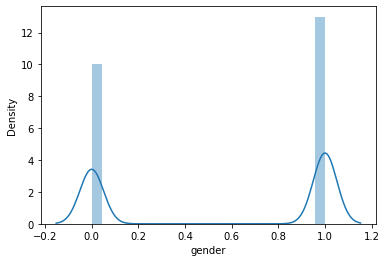

area
-0.8659449491250911


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


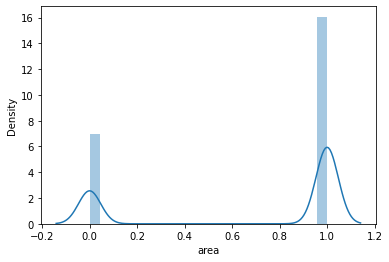

qualification
-0.28126612660025013


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


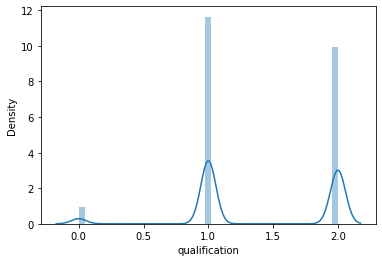

income
-0.24634848314202532


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


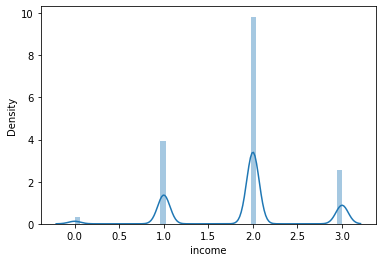

marital_status
-0.30545220097763


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


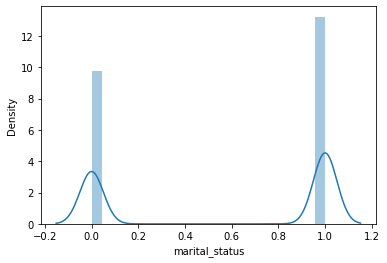

vintage
-0.3782604439479272


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


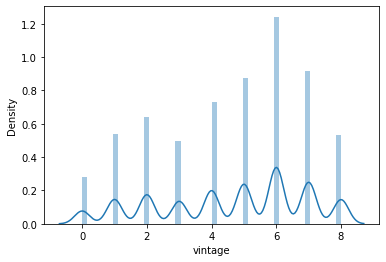

claim_amount
0.3535198165579579


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


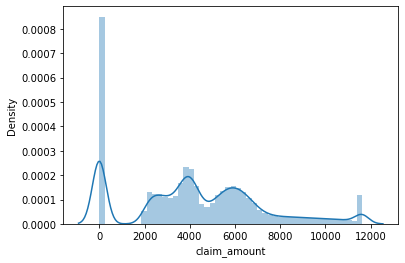

num_policies
-0.7430991412080362


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


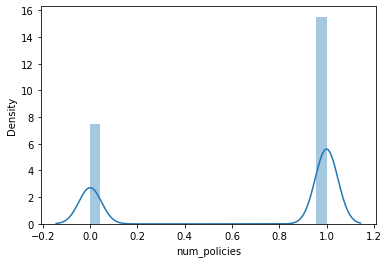

type_of_policy
-0.6037091461281945


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


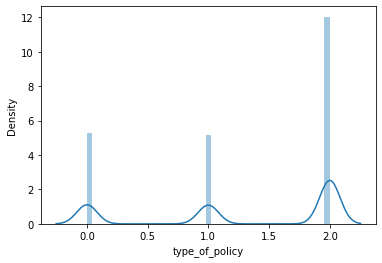

cltv
1.0309065360207346


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


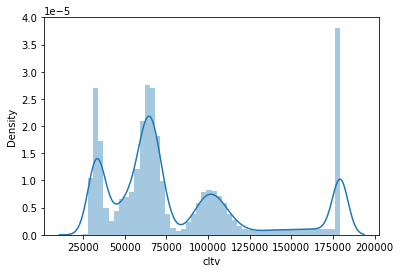

policy_B
1.0045300426403139


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


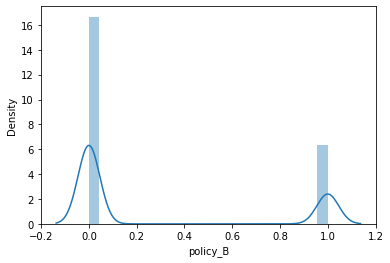

policy_C
2.849242402273252


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


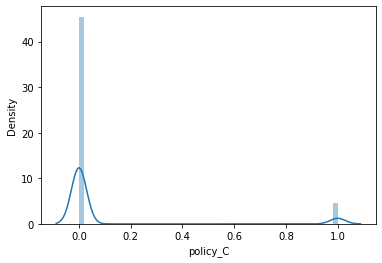

In [325]:
from scipy.stats import skew
for col in Train.columns:
    print(col)
    print(skew(Train[col]))
    
    plt.figure()
    sns.distplot(Train[col])
    plt.show()

In [326]:
X_train = Train.drop(columns=['cltv'],axis=1)
y_train = Train.cltv

In [327]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,
                                              test_size=0.3,
                                              random_state=42)

In [328]:
X_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,policy_B,policy_C
43599,0,1,1.0,3.0,1,6,4222.0,0,1.0,0,0
27625,0,1,1.0,3.0,1,5,3851.0,1,1.0,0,0
28096,1,1,2.0,1.0,1,0,3856.0,1,2.0,0,0
50981,1,0,2.0,2.0,1,0,0.0,0,2.0,1,0
36026,1,0,1.0,3.0,0,7,0.0,1,2.0,0,0


In [329]:
y_train

43599     62136.0
27625     86208.0
28096    102636.0
50981     59928.0
36026     59028.0
           ...   
6265      71316.0
54886     54444.0
76820     66828.0
860       34800.0
15795    104040.0
Name: cltv, Length: 62574, dtype: float64

In [330]:
X_train.shape

(62574, 11)

In [331]:
X_test.shape

(26818, 11)

In [333]:
X_test.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,policy_B,policy_C
10600,0,1,1.0,2.0,1,5,3867.0,1,2.0,0,0
47569,0,1,1.0,2.0,0,2,5466.0,0,2.0,0,0
17246,1,1,2.0,3.0,1,5,2505.0,0,0.0,0,0
71237,0,0,1.0,2.0,1,8,0.0,1,1.0,0,0
64437,0,1,1.0,2.0,0,1,6643.0,1,0.0,0,0


In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [336]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Test_1 = scaler.transform(Test)

x_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
x_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

x_train.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,policy_B,policy_C
0,-1.144825,0.655645,-0.701067,1.665250,0.858520,0.613970,-0.019065,-1.444127,-0.363771,-0.617638,-0.31468
1,-1.144825,0.655645,-0.701067,1.665250,0.858520,0.177410,-0.143104,0.692460,-0.363771,-0.617638,-0.31468
2,0.873496,0.655645,1.054870,-1.290440,0.858520,-2.005388,-0.141432,0.692460,0.850041,-0.617638,-0.31468
3,0.873496,-1.525215,1.054870,0.187405,0.858520,-2.005388,-1.430626,-1.444127,0.850041,1.619071,-0.31468
4,0.873496,-1.525215,-0.701067,1.665250,-1.164795,1.050530,-1.430626,0.692460,0.850041,-0.617638,-0.31468


In [337]:
Test_2 = pd.DataFrame(Test_1,columns= Test.columns)

In [344]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [393]:
param_grid = {

    'bootstrap': [True],

    'max_depth': [110,150,200],

    'max_features': [5,7, 9, 11],

    'min_samples_leaf': [5,7,9],

    'min_samples_split': [12,16,20],

    'n_estimators': [400,500,700,1000]

}

In [394]:
regressor = RandomForestRegressor()

In [395]:
grid_search = GridSearchCV(estimator = regressor , param_grid = param_grid, 

                          cv = 4, n_jobs = -1, verbose = 2)

In [396]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 400}

In [380]:
Model=RandomForestRegressor(bootstrap=True,min_samples_leaf = 5,min_samples_split=12, max_features=9, n_estimators= 400, max_depth=110)


In [381]:
Model.fit(x_train,y_train)

RandomForestRegressor(max_depth=110, max_features=9, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=400)

In [382]:
pred = Model.predict(x_test)

In [383]:
df1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred})
df1.head()

,Real Values,Predicted Values
10600,106116.0,84061.403955
47569,30852.0,46397.460164
17246,43152.0,45294.874108
71237,71448.0,86997.927408
64437,70008.0,113265.797641


In [384]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, pred))
print('Max Error:', metrics.max_error(y_test, pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, pred))
print('R^2:', metrics.r2_score(y_test, pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, pred))

Mean Absolute Error (MAE): 30254.49389027518
Mean Squared Error (MSE): 1546130812.9609327
Root Mean Squared Error (RMSE): 39320.86994155817
Mean Absolute Percentage Error (MAPE): 0.4039458555902816
Explained Variance Score: 0.25996278270093187
Max Error: 139504.19287493807
Mean Squared Log Error: 0.186379029907442
Median Absolute Error: 21844.021508880283
R^2: 0.2599416600598876
Mean Poisson Deviance: 16034.303078887644
Mean Gamma Deviance: 0.18658398560974782


In [385]:
prediction= Model.predict(Test_2)

In [386]:
prediction

array([ 76611.53100608,  95524.1112282 ,  87750.60752079, ...,
        88570.70623014,  88227.09542546, 111082.1220015 ])

In [387]:
final_submission = pd.DataFrame(data = {'id' : Test_data.id, 'cltv': prediction})
final_submission.to_csv('submission.csv', index = False)